# 14.3.2 AlexNet

**AlexNet (2012):** $\;$ CNN de Alex Krizhevsky para ImageNet ($1000$ clases) con $15.3\%$ de error top-5
* Salidas correctas: 55x55x96, 27x27x96, 27x27x96, 13x13+x256, 13x13x384, 13x13x384, 13x13x256, 6x6x256
<div align="center">
<table><tr>
<td style="border: none;"><img src="LeNetAlexNet.png" width=800/></td>
</tr></table>
</div>

**Ejemplo:** $\;$ AlexNet reducida para Fashion-MNIST

In [3]:
import numpy as np; import matplotlib.pyplot as plt
import tensorflow as tf; from tensorflow import keras; import tensorflow_datasets as tfds
ds_train, ds_test = tfds.load('fashion_mnist', split=['train', 'test'], as_supervised=True)
def normalize_img(image, label): return tf.cast(image, tf.float32) / 255., label
X_train = ds_train.map(normalize_img).batch(128)
X_test = ds_test.map(normalize_img).batch(128)
M = keras.Sequential(); R = 3 # factor de reducción
M.add(keras.layers.Conv2D(filters=96/R, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
M.add(keras.layers.MaxPool2D(pool_size=3, strides=1))
M.add(keras.layers.Conv2D(filters=256/R, kernel_size=3, padding='same', activation='relu'))
M.add(keras.layers.MaxPool2D(pool_size=3, strides=1))
M.add(keras.layers.Conv2D(filters=384/R, kernel_size=3, padding='same', activation='relu'))
M.add(keras.layers.Conv2D(filters=384/R, kernel_size=3, padding='same', activation='relu'))
M.add(keras.layers.Conv2D(filters=256/R, kernel_size=3, padding='same', activation='relu'))
M.add(keras.layers.MaxPool2D(pool_size=3, strides=1))
M.add(keras.layers.Flatten())
M.add(keras.layers.Dense(4096/R, activation='relu'))
M.add(keras.layers.Dropout(0.5))
M.add(keras.layers.Dense(4096/R, activation='relu'))
M.add(keras.layers.Dropout(0.5))
M.add(keras.layers.Dense(10))
optimizer = tf.keras.optimizers.Adam(0.001)
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = [keras.metrics.SparseCategoricalAccuracy()]
M.compile(optimizer=optimizer, loss=loss, metrics=metrics)
EarlyStopping_cb = keras.callbacks.EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=2)
H = M.fit(X_train, epochs=100, validation_data=X_test, verbose=0, callbacks=[EarlyStopping_cb])

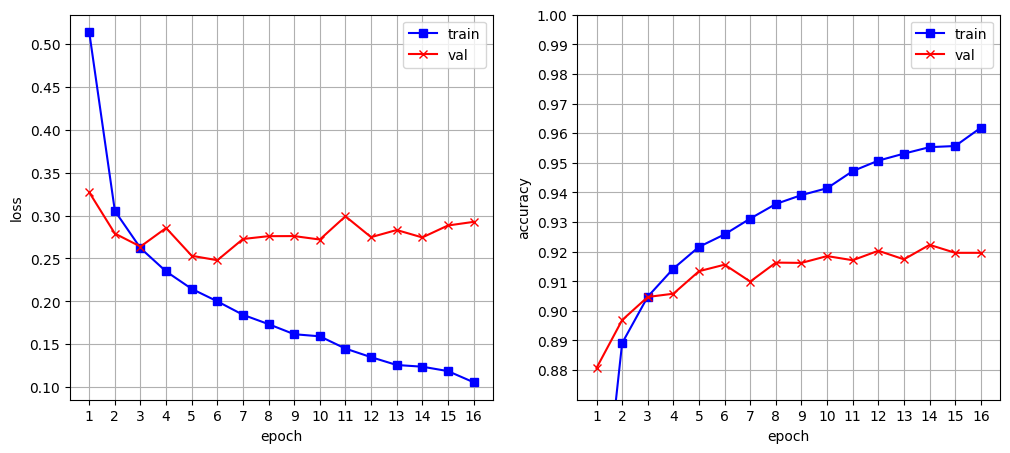

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
xx = np.arange(1, len(H.history['loss'])+1)
xticks = np.concatenate((np.array([1]), np.arange(2, len(H.history['loss'])+1, 1)))
ax = axes[0]; ax.grid(); ax.set_xlabel('epoch'); ax.set_ylabel('loss');
ax.set_xticks(xticks)
ax.plot(xx, H.history['loss'], color='b', marker='s', label='train')
ax.plot(xx, H.history['val_loss'], color='r', marker='x', label='val'); ax.legend()
ax = axes[1]; ax.grid(); ax.set_xlabel('epoch'); ax.set_ylabel('accuracy')
ax.set_xticks(xticks); ax.set_yticks(np.arange(.88, 1.01, .01)); ax.set_ylim([.87, 1.])
ax.plot(xx, H.history['sparse_categorical_accuracy'], color='b', marker='s', label='train')
ax.plot(xx, H.history['val_sparse_categorical_accuracy'], color='r', marker='x', label='val'); ax.legend();